In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

### calling in 10k merger tree realizations

In [3]:
s0 = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]

s15 = np.load("../../../data/cross_host/lognorm_015_psi3/models.npz")["mass"]

s30 = np.load("../../../data/cross_host/lognorm_030_psi3/models.npz")["mass"]

In [4]:
def push_SAGA(lgMh_mat, theta, min_mass):

    lgMs_mat = np.apply_along_axis(jsm_SHMR.general, 0, theta, lgMh_mat, 0, 1)

    N_std = []
    Ms1_std = []
    for i in range(lgMs_mat.shape[0]):
        stat_i = jsm_stats.SatStats_D(lgMs_mat[i], min_mass=min_mass)
        N_std.append(np.std(stat_i.Nsat_perhost))
        Ms1_std.append(np.std(stat_i.maxmass))

    return np.array(N_std), np.array(Ms1_std)

In [5]:
fid_theta = [10.5, 2.0, 0.0, 0, 0, 0] # no scatter in the SHMR!
min_mass = 6.5

In [6]:
N_std_saga_s0, Ms1_std_saga_s0 = push_SAGA(s0, fid_theta, min_mass)

In [7]:
N_std_saga_s15, Ms1_std_saga_s15 = push_SAGA(s15, fid_theta, min_mass)

In [8]:
N_std_saga_s30, Ms1_std_saga_s30 = push_SAGA(s30, fid_theta, min_mass)

In [9]:
def push_single_realization(lgMh_mat, theta, min_mass):

    N_std = []
    Ms1_std = []

    single_trees = lgMh_mat[:, 0]
    for i in range(lgMh_mat.shape[0]):
        lgMh_i = np.tile(single_trees[i], (100, 1))
        lgMs_i = jsm_SHMR.general(theta, lgMh_i, 0, 1)
        stat_i = jsm_stats.SatStats_D(lgMs_i, min_mass=min_mass)

        N_std.append(np.std(stat_i.Nsat_perhost))
        Ms1_std.append(np.std(stat_i.maxmass))

    return np.mean(N_std), np.std(N_std), np.mean(Ms1_std), np.std(Ms1_std)

In [10]:
N_means_s0 = []
N_errs_s0 = []

N_means_s15 = []
N_errs_s15 = []

N_means_s30 = []
N_errs_s30 = []

sigmas = np.linspace(0.1, 2.5, 24)

for sigma in sigmas:
    mean_i_s0, err_i_s0, _, _ = push_single_realization(s0, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s0.append(mean_i_s0)
    N_errs_s0.append(err_i_s0)

    mean_i_s15, err_i_s15, _, _ = push_single_realization(s15, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s15.append(mean_i_s15)
    N_errs_s15.append(err_i_s15)

    mean_i_s30, err_i_s30, _, _ = push_single_realization(s30, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s30.append(mean_i_s30)
    N_errs_s30.append(err_i_s30)

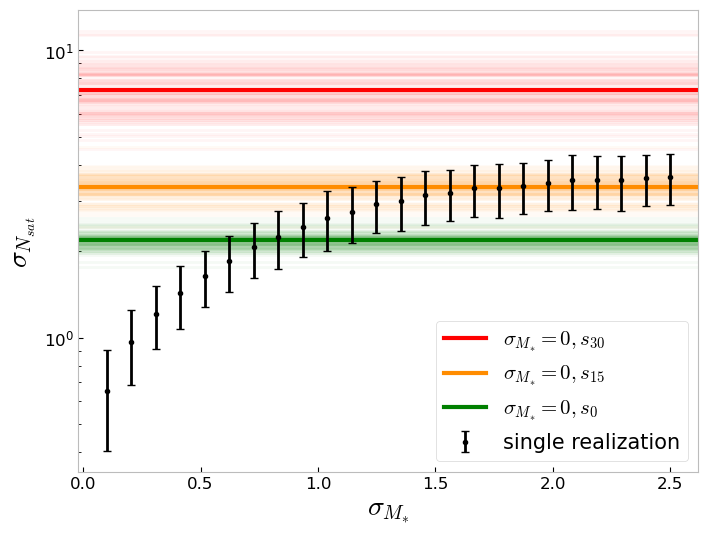

In [11]:
plt.figure(figsize=(8,6))

for i in range(100):
    plt.axhline(N_std_saga_s30[i], color="red", alpha=0.04)
    plt.axhline(N_std_saga_s15[i], color="darkorange", alpha=0.04)
    plt.axhline(N_std_saga_s0[i], color="green", alpha=0.04)

plt.axhline(np.mean(N_std_saga_s30), color="red", lw=3, label="$\\sigma_{M_{*}}=0,  s_{30}$")
plt.axhline(np.mean(N_std_saga_s15), color="darkorange", lw=3, label="$\\sigma_{M_{*}}=0,  s_{15}$")
plt.axhline(np.mean(N_std_saga_s0), color="green", lw=3, label="$\\sigma_{M_{*}}=0,  s_{0}$")

#plt.errorbar(sigmas, N_means_s30, yerr=N_errs_s30, fmt=".", capsize=3, color="black")
plt.errorbar(sigmas, N_means_s15, yerr=N_errs_s15, fmt=".", capsize=3, color="black", label="single realization")
#plt.errorbar(sigmas, N_means_s0, yerr=N_errs_s0, fmt=".", capsize=3, color="green")

plt.legend(fontsize=15)

plt.xlabel('$\\sigma_{M_{*}}$', fontsize=20)
plt.ylabel("$\\sigma_{N_{sat}}$ ", fontsize=20)
plt.yscale("log")
plt.show()

In [12]:
N_means_s0 = []
N_errs_s0 = []

N_means_s15 = []
N_errs_s15 = []

N_means_s30 = []
N_errs_s30 = []

sigmas = np.linspace(0.1, 2.5, 24)

for sigma in sigmas:
    _, _, mean_i_s0, err_i_s0 = push_single_realization(s0, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s0.append(mean_i_s0)
    N_errs_s0.append(err_i_s0)

    _, _, mean_i_s15, err_i_s15 = push_single_realization(s15, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s15.append(mean_i_s15)
    N_errs_s15.append(err_i_s15)

    _, _, mean_i_s30, err_i_s30 = push_single_realization(s30, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s30.append(mean_i_s30)
    N_errs_s30.append(err_i_s30)

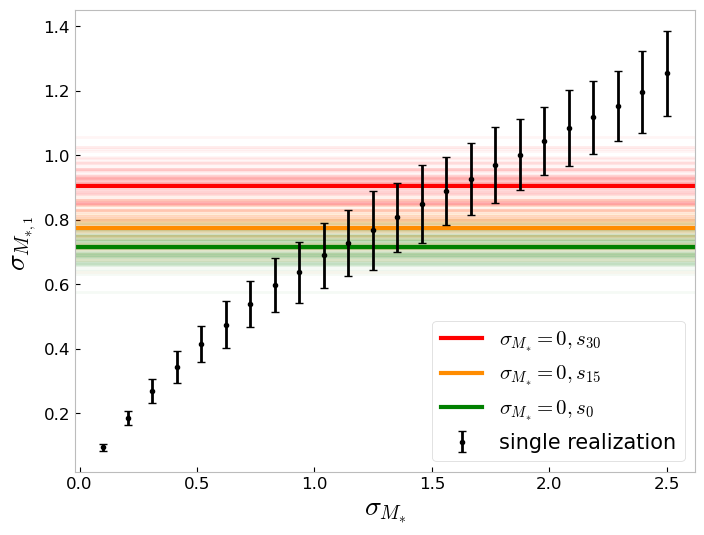

In [13]:
plt.figure(figsize=(8,6))

for i in range(100):
    plt.axhline(Ms1_std_saga_s30[i], color="red", alpha=0.04)
    plt.axhline(Ms1_std_saga_s15[i], color="darkorange", alpha=0.04)
    plt.axhline(Ms1_std_saga_s0[i], color="green", alpha=0.04)

plt.axhline(np.mean(Ms1_std_saga_s30), color="red", lw=3, label="$\\sigma_{M_{*}}=0,  s_{30}$")
plt.axhline(np.mean(Ms1_std_saga_s15), color="darkorange", lw=3, label="$\\sigma_{M_{*}}=0,  s_{15}$")
plt.axhline(np.mean(Ms1_std_saga_s0), color="green", lw=3, label="$\\sigma_{M_{*}}=0,  s_{0}$")

#plt.errorbar(sigmas, N_means_s30, yerr=N_errs_s30, fmt=".", capsize=3, color="red")
plt.errorbar(sigmas, N_means_s15, yerr=N_errs_s15, fmt=".", capsize=3, color="black", label="single realization")
#lt.errorbar(sigmas, N_means_s0, yerr=N_errs_s0, fmt=".", capsize=3, color="green")

plt.legend(fontsize=15)

plt.xlabel('$\\sigma_{M_{*}}$', fontsize=20)
plt.ylabel("$\\sigma_{M_{*, 1}}}$ ", fontsize=20)
plt.show()

In [3]:
def cumulative_mass_function(probabilities):
    """
    Calculate the cumulative mass function (CMF) given a list of probabilities.

    Parameters:
    probabilities (list): List of probabilities of discrete outcomes.

    Returns:
    cmf (list): Cumulative mass function values corresponding to the probabilities.
    """
    cmf = []
    cumulative_probability = 0.0
    for prob in probabilities:
        cumulative_probability += prob
        cmf.append(cumulative_probability)
    return cmf

# Example usage:
probabilities = [0.1, 0.2, 0.3, 0.4]  # Example probabilities
cmf_values = cumulative_mass_function(probabilities)
print("Cumulative Mass Function:", cmf_values)


Cumulative Mass Function: [0.1, 0.30000000000000004, 0.6000000000000001, 1.0]
